In [1]:
import networkx as nx
from __load_graph_data__ import load_graph
from __graph_embeddings__ import graph_embeddings
import pickle
import matplotlib.pyplot as plt


In [2]:
name = 'karate'
g = load_graph(f'../datasets/{name}.gml')

results, probabilities = graph_embeddings(name, 0)
probabilities_dict = {results[i]: probabilities[i] for i in range(len(results))}

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.31it/s]


In [3]:
node_values = nx.get_node_attributes(g, 'value')
node_colors = []
for polarization_value in node_values.values():
    if polarization_value > 0:
        node_colors.append('#FF4C4C')
    else:
        node_colors.append('#0099E5')

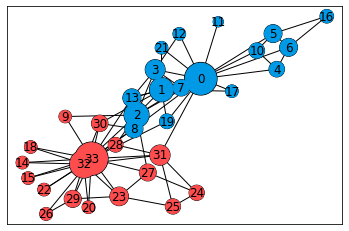

In [4]:
pos = nx.spring_layout(g)
pr = nx.pagerank(g)
nodes = nx.draw_networkx_nodes(g,
                               pos,
                               node_size=[11000 * v for v in pr.values()])
nodes.set_edgecolor('black')
nx.draw_networkx(g,
                 node_color=node_colors,
                 with_labels=True,
                 linewidths=1,
                 pos=pos,
                 node_size=[10000 * v for v in pr.values()])

plt.savefig(f'../figures_generated/before_pol.pdf', dpi=100, bbox_inches="tight")


In [5]:
with open(f"../pickles/{name}/normal/{name}_info", 'rb') as fp:
    info = pickle.load(fp)

In [6]:
Greedy_20 = info[f'Greedy_{name}_10']['result_dictionary']
print(Greedy_20)

[(29, 16), (25, 4), (14, 11), (15, 5), (18, 12), (24, 17), (26, 10), (20, 21), (22, 6), (23, 7)]


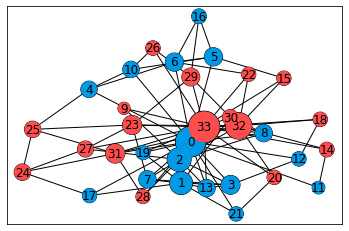

In [7]:
g.add_edges_from(Greedy_20)
pos = nx.spring_layout(g)
pr = nx.pagerank(g)
nodes = nx.draw_networkx_nodes(g,
                               pos,
                               node_size=[11000 * v for v in pr.values()])
nodes.set_edgecolor('black')
nx.draw_networkx(g,
                 node_color=node_colors,
                 with_labels=True,
                 linewidths=1,
                 pos=pos,
                 node_size=[10000 * v for v in pr.values()])


plt.savefig(f'../figures_generated/after_pol.pdf', dpi=100,bbox_inches="tight")
